# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=7a8ada49e90ffd95f40cf269376cd850fd60ad8414a08d5b86be33f1e6799313
  Stored in directory: c:\users\melinda eudy\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

662

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
# Create URL needed begin Weather Retrieval
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_url = f"{url}appid={weather_api_key}&units={units}&q="
print(city_url)
#city = "Charlotte"
#response = requests.get(city_url + city).json()
#print(response)

http://api.openweathermap.org/data/2.5/weather?appid=00af5e4d292309ab2481d0925195c95f&units=imperial&q=


In [51]:
# Create Lists to Store Values 
City_Name = []
Coord_Lat = []
Coord_Lng = []
Max_Temp = []
Humidity = []
Clouds = []
Wind_Speed = []
Country = []
Date = []

# Use x count to use in output list of cities
x = 1

# Make api call and loop through cities
for city in cities:
    response = requests.get(city_url + city).json()
    
# Use try and except to extract data
    try:
        City_Name.append(response["name"])
        Coord_Lat.append(response["coord"]["lat"])
        Coord_Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Clouds.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        print(f"Processing record {x}|{city}")
        x+=1
    
    except(KeyError):
        print("City not found...skipping.")
        
    


Processing record 1|khandbari
Processing record 2|vaini
Processing record 3|jamestown
City not found...skipping.
Processing record 4|tasiilaq
Processing record 5|jeffersontown
Processing record 6|castro
Processing record 7|longyearbyen
City not found...skipping.
Processing record 8|punta arenas
Processing record 9|bredasdorp
Processing record 10|mataura
Processing record 11|monroe
Processing record 12|ushuaia
Processing record 13|khatanga
Processing record 14|cape town
City not found...skipping.
City not found...skipping.
City not found...skipping.
City not found...skipping.
Processing record 15|souillac
Processing record 16|lagos
Processing record 17|rio gallegos
Processing record 18|wilmington
City not found...skipping.
Processing record 19|nyborg
Processing record 20|busselton
Processing record 21|yaring
Processing record 22|san joaquin
Processing record 23|te anau
Processing record 24|port hardy
Processing record 25|gidole
Processing record 26|saint george
Processing record 27|bluf

Processing record 242|wukari
Processing record 243|avera
Processing record 244|romilly-sur-seine
Processing record 245|hasaki
Processing record 246|mount isa
Processing record 247|kysyl-syr
Processing record 248|nantucket
City not found...skipping.
Processing record 249|price
Processing record 250|ust-kuyga
Processing record 251|swift current
Processing record 252|takoradi
Processing record 253|huarmey
Processing record 254|bama
Processing record 255|miles city
Processing record 256|volot
Processing record 257|krasnyy chikoy
Processing record 258|susehri
Processing record 259|liverpool
Processing record 260|vasai
Processing record 261|piombino
Processing record 262|tanete
City not found...skipping.
Processing record 263|vaasa
Processing record 264|verkhnyaya toyma
City not found...skipping.
Processing record 265|mattru
City not found...skipping.
Processing record 266|shubarkuduk
Processing record 267|gdansk
Processing record 268|semey
Processing record 269|nchelenge
Processing record 2

Processing record 488|oranjestad
Processing record 489|deep river
Processing record 490|san patricio
City not found...skipping.
Processing record 491|hofn
Processing record 492|antsohihy
City not found...skipping.
Processing record 493|belaya gora
Processing record 494|north bend
Processing record 495|takab
Processing record 496|wegrow
Processing record 497|gainesville
Processing record 498|bucerias
Processing record 499|corcoran
City not found...skipping.
City not found...skipping.
Processing record 500|tongling
Processing record 501|port hedland
Processing record 502|wonthaggi
City not found...skipping.
Processing record 503|kirando
Processing record 504|sao jose da coroa grande
Processing record 505|kamina
Processing record 506|mount gambier
Processing record 507|marawi
Processing record 508|kafanchan
Processing record 509|zhoucheng
Processing record 510|filimonovo
Processing record 511|jeremie
Processing record 512|camopi
Processing record 513|riyadh
Processing record 514|san jeron

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
#Create city data frame and save to .csv file
city_df = pd.DataFrame({"City":City_Name,
                       "Lat":Coord_Lat,
                       "Lng":Coord_Lng,
                       "Max Temp":Max_Temp,
                       "Humidity":Humidity,
                       "Cloudiness":Clouds,
                       "Wind Speed":Wind_Speed,
                       "Country":Country,
                       "Date":Date})
city_df.to_csv("../output_data/city.csv")
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khanbari,27.3747,87.2039,50.50,74,100,1.57,NP,1612620907
1,Vaini,-21.2000,-175.2000,77.00,100,90,3.44,TO,1612620907
2,Jamestown,42.0970,-79.2353,16.00,67,90,21.85,US,1612620908
3,Tasiilaq,65.6145,-37.6368,32.00,93,90,21.85,GL,1612620909
4,Jeffersontown,38.1942,-85.5644,30.99,64,1,6.91,US,1612620909


In [53]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,603.000000,603.000000,603.000000,603.000000,603.00000,603.000000,6.030000e+02
mean,19.449249,14.965675,51.674179,70.864013,54.61194,8.067181,1.612621e+09
std,33.059444,91.487678,33.835323,21.235151,40.28955,5.526029,7.461674e+01
min,-54.800000,-179.166700,-43.010000,5.000000,0.00000,0.340000,1.612620e+09
25%,-7.657650,-66.769050,32.000000,59.500000,6.00000,3.440000,1.612621e+09
50%,22.038300,17.117800,61.000000,76.000000,75.00000,6.910000,1.612621e+09
75%,47.546150,100.268700,78.800000,86.000000,95.50000,11.490000,1.612621e+09
max,78.218600,178.416700,103.230000,100.000000,100.00000,27.630000,1.612621e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [54]:
# per chart above max humidity is 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

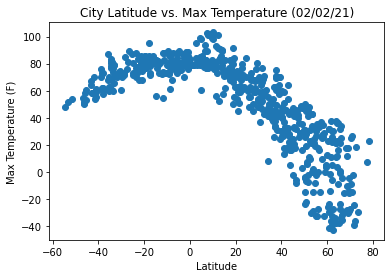

Based on the Random Cities selected, the closer the city is to the equator the higher the max temperature.  There is a clear relationship in the scatter plot from left to right.


In [55]:
plt.scatter(city_df["Lat"],city_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature (02/02/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Output_data/Lat_Temp.png")
plt.show()
print("Based on the Random Cities selected, the closer the city is to the equator the higher the max temperature.  There is a clear relationship in the scatter plot from left to right.")

## Latitude vs. Humidity Plot

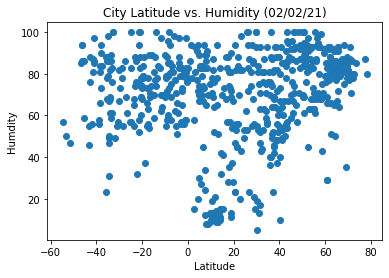

Based on the Random Cities selected, there is no correlation between the city latitude and the Humidity of the city.


In [56]:
plt.scatter(city_df["Lat"],city_df["Humidity"])
plt.title("City Latitude vs. Humidity (02/02/21)")
plt.xlabel("Latitude")
plt.ylabel("Humdity")
plt.savefig("../Output_data/Lat_Humidity.png")
plt.show()
print("Based on the Random Cities selected, there is no correlation between the city latitude and the Humidity of the city.")

## Latitude vs. Cloudiness Plot

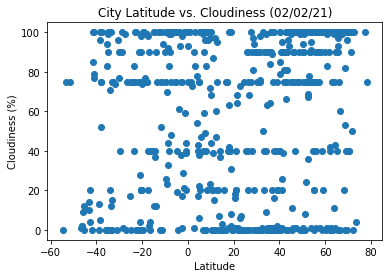

Based on the Random Cities selected, there city latititude and the cloudiness of the city have absolutely nothing to do with each other.


In [57]:
plt.scatter(city_df["Lat"],city_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (02/02/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Output_data/Lat_Cloud.png")
plt.show()
print("Based on the Random Cities selected, there city latititude and the cloudiness of the city have absolutely nothing to do with each other.")

## Latitude vs. Wind Speed Plot

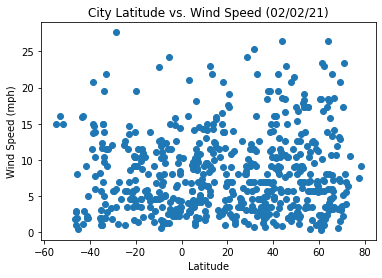

Based on the Random Cities selected, there does not appear to be a relationship between city latitude and wind speed.  At most, you can say that a majority of the cities selected have wind speed from zero (mph) to 12 (mph)


In [58]:
plt.scatter(city_df["Lat"],city_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (02/02/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Output_data/Lat_Wind.png")
plt.show()
print("Based on the Random Cities selected, there does not appear to be a relationship between city latitude and wind speed.  At most, you can say that a majority of the cities selected have wind speed from zero (mph) to 12 (mph)")

## Linear Regression

In [59]:
# Group the city list into two lists, one for the northern hemisphere and one for the southern hemisphere
northern_city_df = city_df.loc[(city_df["Lat"] >= 0)]
southern_city_df = city_df.loc[(city_df["Lat"] < 0)]

# Linear regression model for northern hemisphere.
x_values = northern_city_df["Lat"]
y_values = northern_city_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.743132973880143


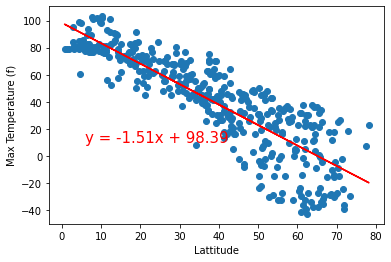

Based on the Random Cities selected, there does appear to be a relationship between city latitude and Maximum Temperature.


In [60]:
# plotting regression model

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (f)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Output_data/MaxTemp_Lat_Northern.png")
plt.show()
print("Based on the Random Cities selected, there does appear to be a relationship between city latitude and Maximum Temperature.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [61]:
# Linear regression model for southern hemisphere.
x_values = southern_city_df["Lat"]
y_values = southern_city_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.4458911260359939


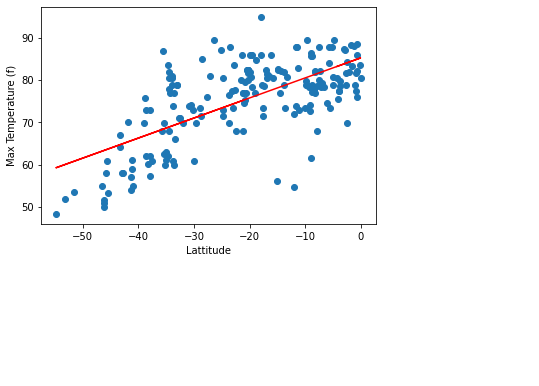

Based on the Random Cities selected, there does appear to be a relationship between city latitude and Maximum Temperature.


In [62]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (f)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Output_data/MaxTemp_Lat.Southern.png")
plt.show()
print("Based on the Random Cities selected, there does appear to be a relationship between city latitude and Maximum Temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [63]:
# Linear regression model for northern hemisphere.
x_values = northern_city_df["Lat"]
y_values = northern_city_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.14141029596109891


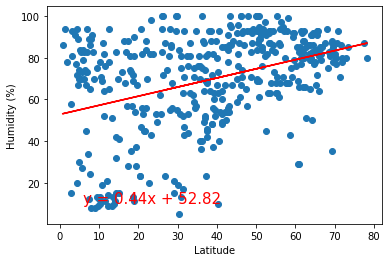

Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.


In [64]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Output_data/Humidity_Lat_Northern.png")
plt.show()
print("Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [65]:
# Linear regression model for southern hemisphere.
x_values = southern_city_df["Lat"]
y_values = southern_city_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.004508111519138314


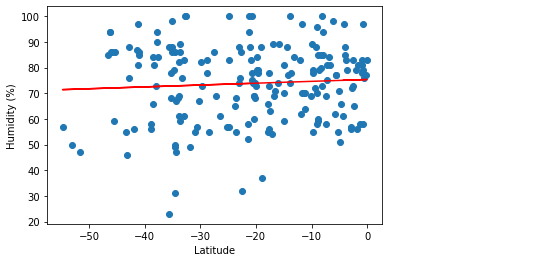

Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.


In [66]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Output_data/Humidity_Lat_Southern.png")
plt.show()
print("Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [67]:
# Linear regression model for northern hemisphere.
x_values = northern_city_df["Lat"]
y_values = northern_city_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.04020453654122708


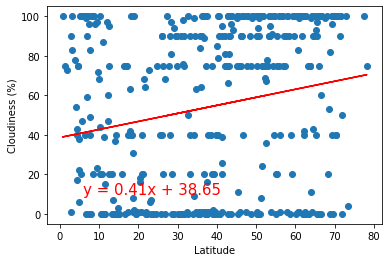

Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.


In [68]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Output_data/Cloudiness_Lat_Northern.png")
plt.show()
print("Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [69]:
# Linear regression model for southern hemisphere.
x_values = southern_city_df["Lat"]
y_values = southern_city_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.09903262651833558


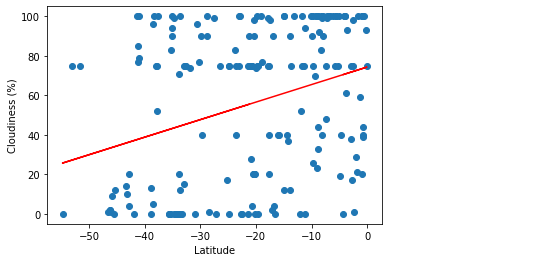

Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.


In [70]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Output_data/Cloudiness_Lat_Southern.png")
plt.show()
print("Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [71]:
# Linear regression model for northern hemisphere.
x_values = northern_city_df["Lat"]
y_values = northern_city_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.0007665971432237901


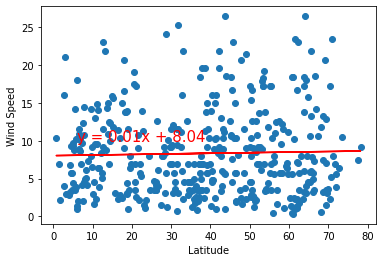

Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.


In [72]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Output_data/Wind_Lat_Northern.png")
plt.show()
print("Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [73]:
# Linear regression model for southern hemisphere.
x_values = southern_city_df["Lat"]
y_values = southern_city_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.006199306205294134


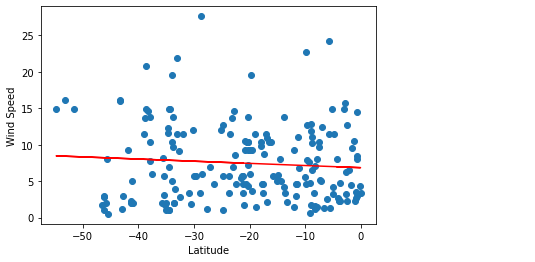

Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.


In [74]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Output_data/Wind_Lat_Souththern.png")
plt.show()
print("Based on the Random Cities selected, there does not appear to be a relationship between city latitude and Maximum Temperature.  The linear line is nearly horizontal.")